# Medical Treatment Cost Forecasting

**Link**

https://www.kaggle.com/mirichoi0218/insurance


**Context**

This dataset contains the cost of medical treatment of different patients.


**Content**

The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients. But we have other information that can help us to make a conclusion about the health of patients and predict the cost of medical treatment by using regression analysis.

The dataset consists of the following attributes:
- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: body mass index, providing an understanding of body, weights that are relatively high or low relative to height
- children: number of children covered by health insurance / Number of dependents
- smoker: smoking (0: no, 1: yes)
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: individual medical costs billed by health insurance

The `charges` attribute is our target variable, which should be predicted depending on new patient informations.

**Task (Regression)**

Your task is to use the present data set to predict the cost of medical treatment for new patients. To do this, use the `Linear Regression` and `SVR` methods for this task. You must also include a third method that you have selected yourself.

First of all, get an overview of the project in your group. Then carefully read the checklist for machine learning projects and think about how you want to organize your group work. It is strongly recommended that all task items are completed by all group members. You can divide the focus among yourself, but make sure that all members are as well informed as possible about the content.

Use the checklist for machine learning projects as a guide when working on the task. Document all the individual steps that are listed there (main and sub-items). Make sure to use Markdown Cells for your documentation. Document the functionality of your algorithms (all three) with equations and explanations. Dont forget, this project is a task for five students. We expect a detailed documentation of your approach and your results.

**Note**

We are aware that there are examples and solutions for the selected data sets on popular platforms, e.g. Kaggle. You are welcome to use them as a guide. But remember that at the end of the project, your own work will be assessed. We compare the results with the popular solutions of common platforms. We would like to recognize the independence in your work and see a difference to the existing solution approaches.

# Code und Dokumentation

# Frame the problem

**1.1 Ziel** 
Das Ziel dieses Projektes ist es, die Kosten für die medizinische Behandlung von Patienten anhand ihrer demografischen Daten und ihres Lebensstils genau vorhertzusagen.
   
**1.2 Verwendung der Lösung**
Das Prognosemodell wird von Versicherungsunternehmen verwendet, um medizinische Behandlungskosten für neue und bestehende Versicherungsnehmer zu schätzen. Dies wird bei der Prämienfestsetzung, Risikobewertung und Finanzplanung helfen.

**1.3 Aktuelle Lösungen**
Versicherungsunternehmen verwenden in der Regel versicherungsmathematische Methoden (Traditionelle statistische Methoden) und manuelle Schätzungen (Komplexe Regeln) zur Kostenschätzung auf der Grundlage historischer Daten und demografischer Profile. Diese Methoden nutzen die verfügbaren Daten oder die neuesten Fortschritte im Bereich des maschinellen Lernens möglicherweise nicht vollständig aus. Diese könenn zeitaufwändig, teuer und ungenau sein.  

**1.4 Einordnung des Problems**

Typ: Überwachtes Lernen
Herangehensweise: Regression
Modus: Offline
Begründung:
Wir haben historische Daten mit bekannten Kosten (Gebühren) und damit verbundenen Merkmalen. Das Ziel ist die Vorhersage einer kontinuierlichen Variable, was es zu einem Regressionsproblem macht. Ein Offline-Ansatz ist angemessen, da wir das Modell auf historischen Daten trainieren und es dann für zukünftige Vorhersagen einsetzen werden.

**1.5 Messung der Genauigkeit**
Die Genauigkeit wird anhand von Kennzahlen wie dem mittleren absoluten Fehler (MAE) und dem mittleren quadratischen Wurzelfehler (RMSE) gemessen.

**1.6 Ausrichtung an den Unternehmenszielen**
Niedrigere Werte dieser Fehlermetriken deuten auf genauere Vorhersagen hin, was mit dem Ziel einer genauen Vorhersage der medizinischen Kosten übereinstimmt.

**1.7 Erforderliche Mindestleistung**
Die geforderte Mindestleistung sollte mit aktuellen versicherungsmathematischen Methoden verglichen werden. Eine Verbesserung der Vorhersagegenauigkeit gegenüber diesen traditionellen Methoden würde als Erfolg gewertet werden. Spezifische Schwellenwerte können nach einer ersten Bewertung der derzeitigen Methoden festgelegt werden.

**1.8 Vergleichbare Probleme**
- Hauspreisvorhersage
- Vorhersage von Kfz-Versicherungsansprüchen
- Vorhersage von Darlehenausfällen

**1.9 Wiederverwendung von Tools**
- Erfahrungen und Tools aus diesen vergleichbaren Regressionsproblemen können genutzt werden, z. B.: Techniken der Merkmalstechnik, Strategien zur Modellauswahl
Bewertungsmetriken

**1.10 Menschliches Fachwissen**
- Versicherungsmathematischen Experten, die Fachwissen zur verfügungstellen
- Datenwissenschaftler mit Erfahrung in der Regressionsanalyse
- Medizinische Fachleute, die die Auswirkungen von Gesundheitsfaktoren auf die Kosten verstehen

**1.11 Manueller Ansatz**
Versicherungsmathematiker verwenden derzeit statistische Methoden und die Analyse historischer Daten, um die Kosten zu schätzen. Sie können Patienten anhand von Alter, BMI, Raucherstatus usw. in verschiedene Risikokategorien einteilen und diesen Kategorien Durchschnittskosten zuordnen.

**1.12 Annahmen**

- Der Datensatz ist repräsentativ für die Bevölkerung.
- Die einbezogenen Faktoren (Alter, Geschlecht, BMI, Kinder, Raucher, Region) sind ausreichend, um die Kosten vorherzusagen.
- Es gibt keine signifikanten externen Faktoren (z. B. politische Veränderungen, große medizinische Fortschritte), die die Kosten drastisch verändern.


**1.13 Modellauswahl und Implementierung**

- Lineare Regression
- Support-Vektor-Regression (SVR)
- (dritte von der Gruppe ausgewählte Methode)



In [598]:
import pandas as pd

In [599]:
data = pd.read_csv('insurance.csv')
insurance_data = data.copy()

In [600]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [601]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [602]:
insurance_data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [603]:
insurance_data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [604]:
insurance_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [605]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [606]:
print(insurance_data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [607]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [608]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [609]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [610]:
x = insurance_data.drop(['charges'], axis=1)
y = insurance_data['charges']

x = pd.get_dummies(x, drop_first=True)

In [611]:
x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


In [612]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [613]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()

In [614]:
from sklearn.svm import SVR

SVR_reg = SVR(kernel='rbf')
SVR_reg.fit(x_train, y_train)

SVR()

In [615]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

y_pred = scaler.inverse_transform(SVR_reg.predict(x_test).reshape(-1, 1)).flatten()

# RMSE berechnen
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

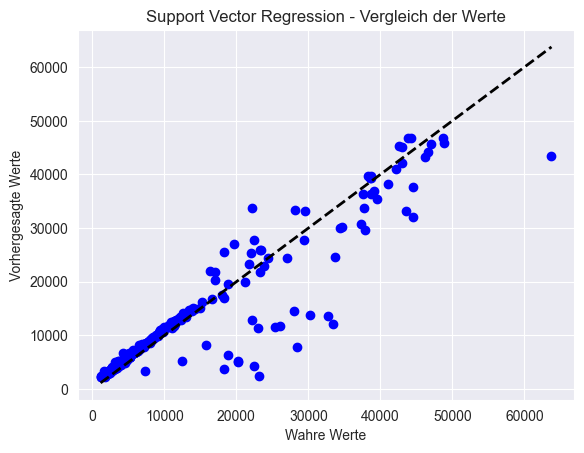

In [616]:
from matplotlib import pyplot as plt

plt.scatter(y_test, y_pred, color='blue', label='Vorhergesagte Werte')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
plt.xlabel('Wahre Werte')
plt.ylabel('Vorhergesagte Werte')
plt.title('Support Vector Regression - Vergleich der Werte')
plt.show()

In [617]:
print("Mean Squared Error:", rmse)
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 4623.884951742307
R^2 Score: 0.8622834992498352
